In [51]:
import numpy as np 
import matplotlib.pyplot as plt 


In [52]:
#define positive and negative classes]
#positive points true value is +1 and -1 for negative
positive_points = np.array([(-2,3),(0,1),(2,-1)])
negative_points = np.array([(-2,1),(0,-1),(2,-3)])


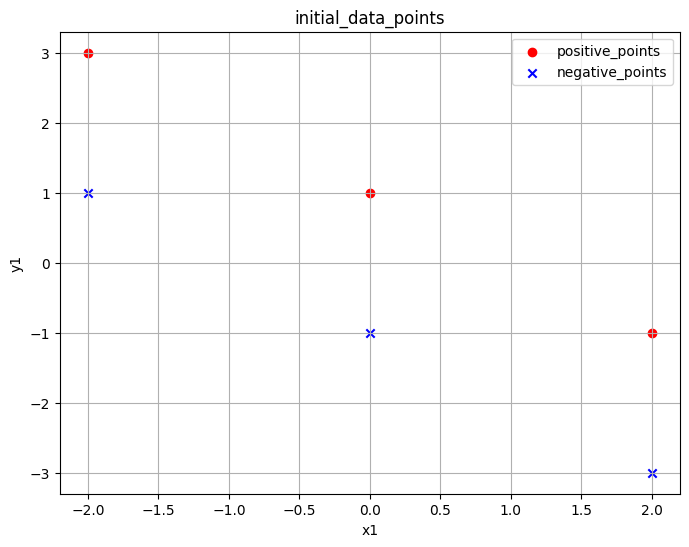

In [53]:
#plot initial points 
plt.figure(figsize=(8,6))
plt.scatter(positive_points[:,0],positive_points[:,1],color = 'red',marker ='o',label = 'positive_points')
plt.scatter(negative_points[:,0],negative_points[:,1],color = 'blue',marker ='x',label = 'negative_points')
plt.legend(loc='best')
plt.xlabel('x1')
plt.ylabel('y1')
plt.title('initial_data_points')
plt.grid(True)
plt.show()

In [54]:
#combining all points and labels 
#vstack is used to stacking the two points of the arrray one upon the other 
X=np.vstack((positive_points,negative_points))
y=np.array([1]*len(positive_points) + [-1]*len(negative_points))

In [55]:
X

array([[-2,  3],
       [ 0,  1],
       [ 2, -1],
       [-2,  1],
       [ 0, -1],
       [ 2, -3]])

In [56]:
y

array([ 1,  1,  1, -1, -1, -1])

In [57]:
def perceptron( X,y,steps=10):
    theta = np.zeros(X.shape[1])
    theta0 = 0
    for t in range(steps):
        for i , xi in enumerate(X):
            if y[i] * (np.dot(xi,theta)+theta0)<=0:
                theta += y[i] * xi
                theta0 += y[i]
                break 
            #plot after each iteration 
        plot_decision_boundary(theta,theta0,t+1)
    return theta,theta0
        

In [58]:
def plot_decision_boundary(theta , theta0 , iteration):
    plt.figure(figsize = (8,6))
    plt.scatter(positive_points[:,0],positive_points[:,1],color='blue',marker = 'o',label = 'positive class')
    plt.scatter(negative_points[:,0],negative_points[:,1],color='red',marker = 'x',label = 'negative class')

    #ploting decision boundary 
    x_values = np.linspace(-3,3,2)
    #check for theta[1] to avoid division by zero in case of vertical lines 
    if theta[1] != 0:
        y_values = -(theta[0] * x_values + theta0) / theta[1]
        plt.plot(x_values , y_values , label = f'iteration {iteration}')
    else: 
        #plot vertical line 
        x_val = -theta0/theta[0]
        plt.axvline(x=x_val,label = f'iteration {iteration}')

    plt.xlim(-3,3)
    plt.ylim(-4,4)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('decision boundary for the iteration {iteration}')
    plt.grid(True)
    plt.legend()
    plt.show()

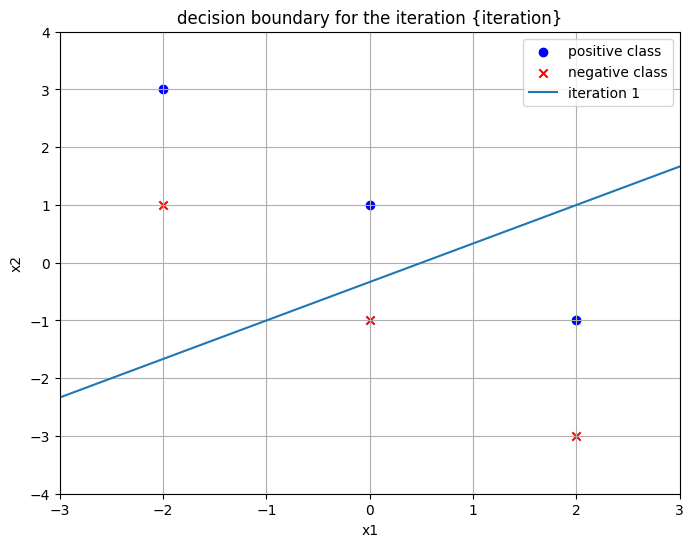

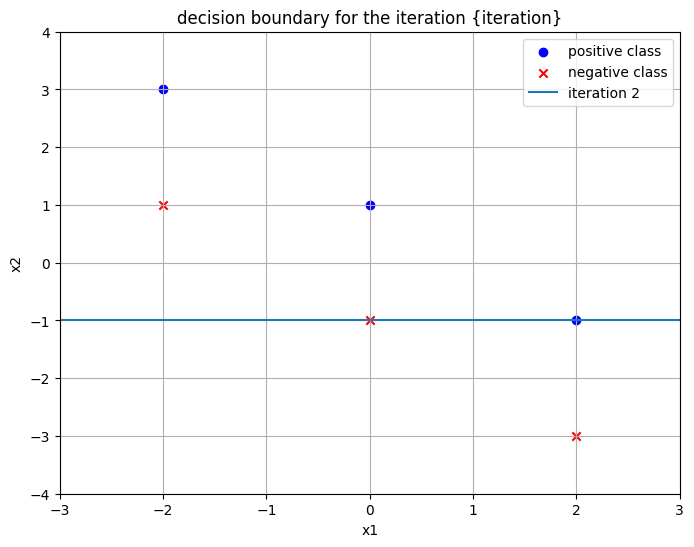

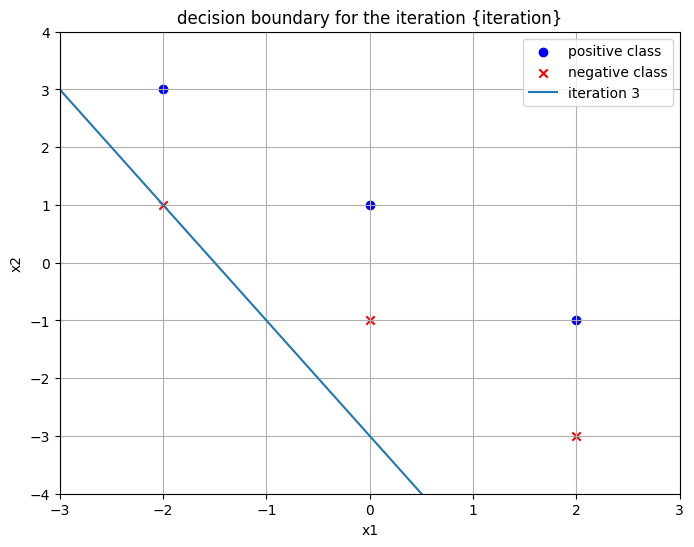

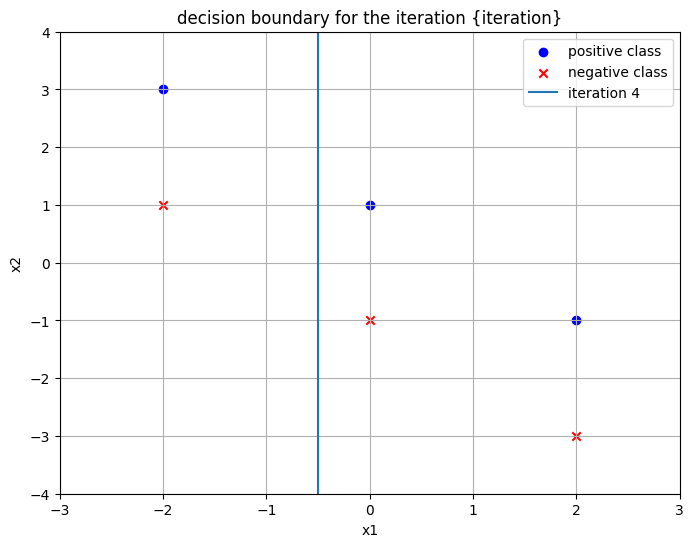

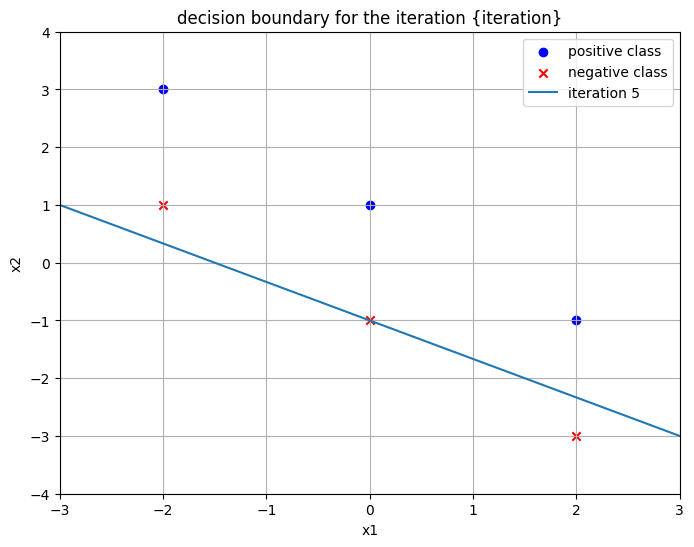

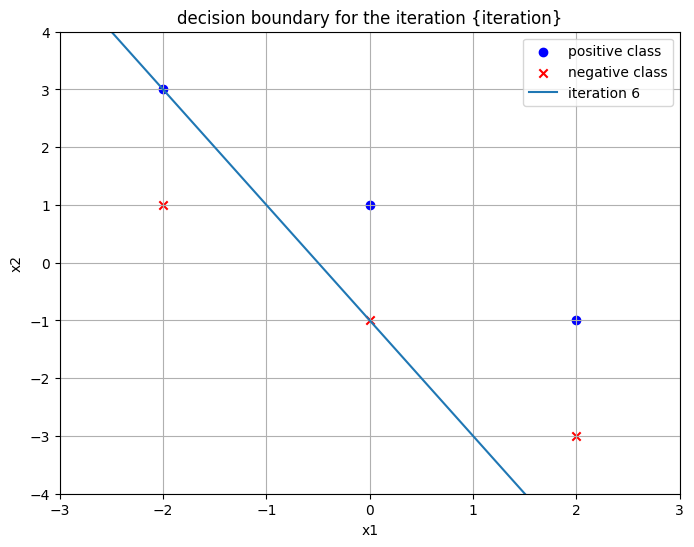

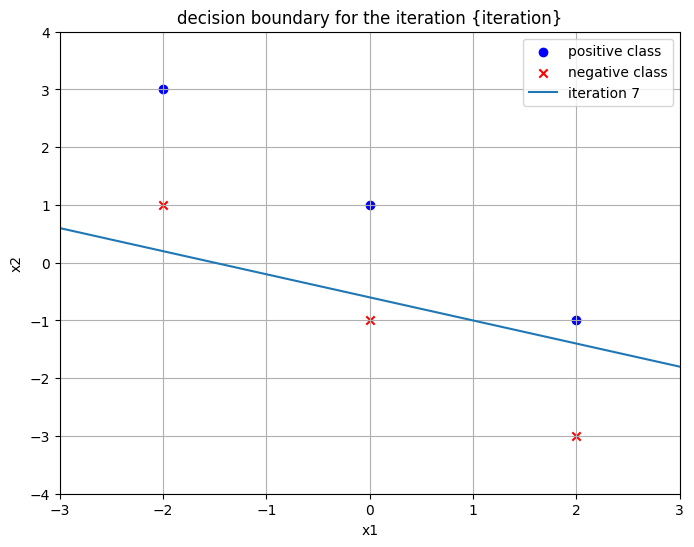

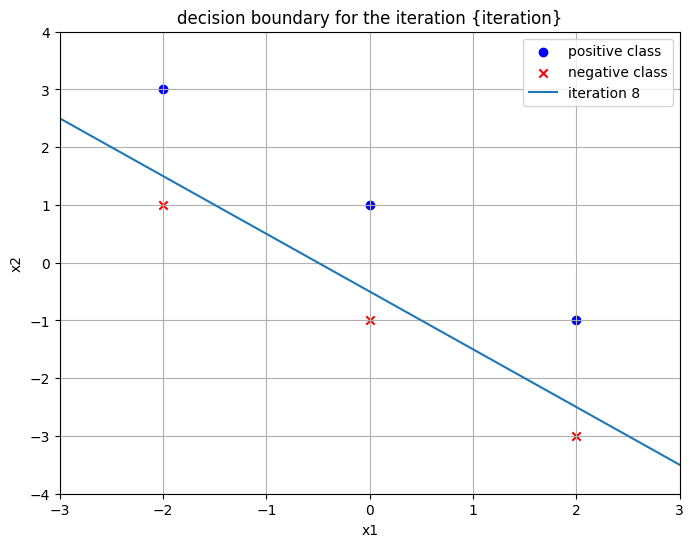

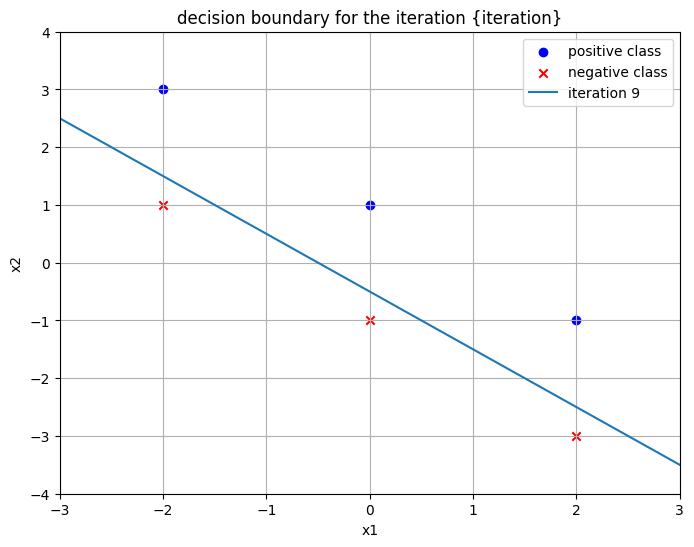

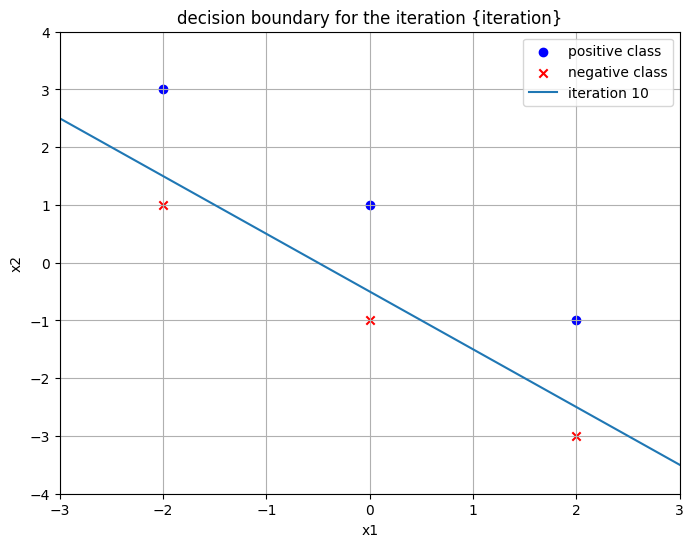

In [59]:
theta_final , theta0_final = perceptron(X,y,10)